### 데이터 표현

In [1]:
num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

* Counter와 plt.bar()를 이용하여 데이터 표현

In [2]:
%matplotlib inline  

<Container object of 101 artists>

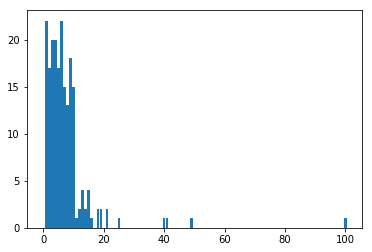

In [3]:
from collections import Counter
from matplotlib import pyplot as plt

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)

### 통계량

* 자료로부터 몇 가지 통계량을 적용해 보자.

In [4]:
num_points = len(num_friends)
print num_points

204


In [5]:
lagest_value = max(num_friends)
print lagest_value

100


In [6]:
smallest_value = min(num_friends) 
print smallest_value

1


In [7]:
sorted_vaule = sorted(num_friends) 
print sorted_vaule

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 18, 18, 19, 19, 21, 21, 25, 40, 41, 49, 100]


In [8]:
smallest_value = sorted_vaule[0]
print smallest_value

1


In [9]:
second_smallest_value = sorted_vaule[1]
print second_smallest_value

1


In [10]:
second_largest_value = sorted_vaule[-2]
print second_largest_value

49


### 중심 성향 - 평균

In [11]:
# this isn't right if you don't from __future__ import division
from __future__ import division
def mean(x):
    return sum(x)/len(x)

In [12]:
mean(num_friends)    #7.333333

7.333333333333333

* 중간값

### 중심 성향 - 중간값

In [13]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [14]:
median(num_friends)     #6.0

6.0

### quantile 

In [15]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [16]:
quantile(num_friends, 0.10)   # 1

1

In [17]:
quantile(num_friends, 0.25)   # 3

3

In [18]:
quantile(num_friends, 0.75)   # 9

9

### 최빈값 – mode

In [19]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

mode(num_friends)    # 1 and 6

[1, 6]

### 범위 – range

In [20]:
def data_range(x):
    return max(x) - min(x)

In [21]:
data_range(num_friends)     # 99

99

### 분산 - variance

In [22]:
from linear_algebra import sum_of_squares, dot
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)   # 81.54

81.54351395730716

### 표준 편차

In [23]:
import math

In [24]:
def standard_deviation(x):
    return math.sqrt(variance(x))

In [25]:
standard_deviation(num_friends)    # 9.03

9.03014473623248

### 사분범위 - Interquartile range

In [26]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [27]:
interquartile_range(num_friends)   # 6

6

### 공분산

In [28]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

* 공분산

In [29]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [30]:
covariance(num_friends, daily_minutes)   # 22.43

22.425435139573064

### 상관관계

In [31]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y    
    else:
        return 0      # if no variation, correlation is zero

In [32]:
correlation(num_friends, daily_minutes)  # 0.25

0.24736957366478218

### scatter plot으로 데이터 확인

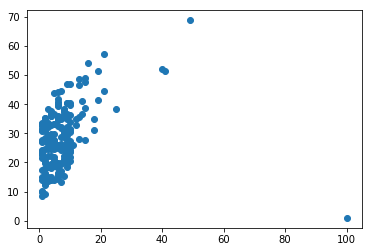

In [33]:
import matplotlib.pyplot as plt
plt.scatter(num_friends, daily_minutes)

### Outlier

* 100명의 친구를 가진 사람은 outlier라고 간주해 보자.
  * 상관관계(correlation)는 outlier에 민감함.

In [34]:
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends)
                         if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes)
                         if i != outlier]
correlation(num_friends_good, daily_minutes_good)   # 0.57

0.5736792115665573

### numpy를 이용한 평균

* mean을 이용하여 평균을 구함. function이나 method로 활용

In [35]:
import numpy as np
x = np.arange(10)
print x.mean()                 #4.5
print np.mean(x)              #4.5

4.5
4.5


* 행렬 형식의 데이터의 평균

In [36]:
b = np.array([[0,1,2], [3,4,5]])
print b.mean()
print b.mean(0)
print b.mean(1)

2.5
[ 1.5  2.5  3.5]
[ 1.  4.]


### numpy를 이용한 중앙값

* np.median은 함수 형식으로 존재

In [37]:
x = np.random.randn(4, 5)
print np.median(x)
print np.median(x, 0)
print np.median(x, 1)

-0.0243043967128
[-0.33553568  0.19694605 -1.18918505  0.56240694 -0.09220538]
[-0.4844956  -0.05502804  0.03993922  0.29170577]


* 여기서 np.random.randn(4, 5)는 표준정규분포를 따르는 난수로 이루어진 4×5 행렬 생성

### numpy를 이용한 분산과 표준편차

* np.std와 np.var함수를 이용하여 분산과 표준편차를 계산

In [38]:
x = np.random.randn(4, 5)
print np.std(x)
print np.std(x, 0)
print np.std(x, 1)

0.935647920358
[ 0.73919229  0.74860034  1.09396454  0.79209593  0.64459842]
[ 1.18932455  0.62342322  0.68769218  0.50263075]


* ddof 인자를 이용하여 자유도 설정 가능 (기본값 : ddof=0)

In [39]:
print np.std(x, ddof=1)   #표준편차 계산시 분모를 N-1로

0.959954511461


### numpy를 이용한 상관계수

* np.corrcoef(x)는 x가 2차원 행렬일 때, 각 행들간의 상관계수 행렬 계산

In [40]:
x = np.random.randn(3, 4)
print np.corrcoef(x)

[[ 1.          0.68463446 -0.11030646]
 [ 0.68463446  1.          0.03007717]
 [-0.11030646  0.03007717  1.        ]]


* np.corrcoef(x, y)는 x, y가 각각 1차원 array일 때 x와 y간의 상관계수 행렬 계산

In [41]:
print np.corrcoef(x[0], x[1])

[[ 1.          0.68463446]
 [ 0.68463446  1.        ]]


* 공분산 행렬은 np.cov()를 이용하여 계산